In [1]:
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', 100)

In [2]:
#track_record = pd.read_csv('track_record_count_150_powell_01.csv')
#track_record = pd.read_csv('experiments/track_record_count_200_powell_01_onlydates_with_bets_between80-20_all_time_serie.csv')
#track_record = pd.read_csv('experiments/main_callback.csv')
#track_record = pd.read_csv('experiments/parallel_onlydates_with_less_80_filter_top5.csv')
#track_record = pd.read_csv('experiments/parallel_all_series - Copia.csv')
#track_record = pd.read_csv('experiments/parallel_all_series.csv')
#track_record = pd.read_csv('experiments/parallel_all_series_new_filter_test.csv')
track_record = pd.read_csv('experiments/all_series_final_solution.csv')
#track_record = pd.read_csv('experiments/parallel_test.csv')
#track_record = pd.read_csv('just_a_test.csv')

#track_record['return2'] = track_record['return'].shift(fill_value=0)-1
#track_record['return2'] = track_record['return'] - 1
#track_record['return3'] = track_record['return'] + track_record['return'].shift(fill_value=0)-1
#track_record['return3'] = track_record['return'] + track_record['return'].shift(fill_value=0)-1
#track_record['return4'] = track_record['return2'].cumsum()

#set_inital = pd.DataFrame({'game_id': ["0000000"], "return": [1]})

#track_record = pd.concat([set_inital, track_record]).reset_index(drop=True)
#track_record['stake'] = track_record['return'].shift(fill_value=1)
#track_record['return_shifted'] = track_record['return'].shift(periods=-1)
track_record

,0,1,2,3,4,5
0,2738735,0.480377,5,2019-04-27,False,True
1,2738739,0.000000,5,2019-04-27,False,True
2,2738740,0.185077,5,2019-04-27,False,True
3,2740879,0.121340,4,2019-04-28,True,True
4,2740882,0.085205,5,2019-04-28,True,True
...,...,...,...,...,...,...
1384,5924758,NaN,5,2022-11-13,True,False
1385,5924757,NaN,5,2022-11-13,True,False
1386,5924755,NaN,5,2022-11-13,True,False
1387,5924772,NaN,5,2022-11-13,True,False


In [3]:
track_record.columns = ['game_id',	'return',	'n_bets',	'datetime',	'time_limit_flag', 'is_valid_solution']

In [4]:
#track_record = track_record[(track_record.datetime.apply(str)>"2020-01-01")&(track_record.datetime.apply(str)<"2021-01-01")]
#track_record = track_record[(track_record.datetime.apply(str)<"2020-01-01")]

In [5]:
track_record

,game_id,return,n_bets,datetime,time_limit_flag,is_valid_solution
0,2738735,0.480377,5,2019-04-27,False,True
1,2738739,0.000000,5,2019-04-27,False,True
2,2738740,0.185077,5,2019-04-27,False,True
3,2740879,0.121340,4,2019-04-28,True,True
4,2740882,0.085205,5,2019-04-28,True,True
...,...,...,...,...,...,...
1384,5924758,NaN,5,2022-11-13,True,False
1385,5924757,NaN,5,2022-11-13,True,False
1386,5924755,NaN,5,2022-11-13,True,False
1387,5924772,NaN,5,2022-11-13,True,False


In [6]:
#track_record = track_record[~(track_record['return'].isna())]

In [7]:
count_col = track_record.groupby(['datetime']).count().reset_index()['game_id']
is_valid_solution = track_record.groupby(['datetime']).any().reset_index()['is_valid_solution']

In [8]:
track_record = track_record.groupby(['datetime'])[['return', 'n_bets']].sum().reset_index()
track_record['count'] = count_col
track_record['is_valid_solution'] = is_valid_solution
track_record

,datetime,return,n_bets,count,is_valid_solution
0,2019-04-27,0.665453,15,3,True
1,2019-04-28,1.148989,34,7,True
2,2019-05-01,0.000000,25,5,False
3,2019-05-02,1.383096,25,5,True
4,2019-05-04,1.045380,10,2,True
...,...,...,...,...,...
309,2022-11-05,1.332791,25,5,True
310,2022-11-06,1.161109,20,4,True
311,2022-11-09,1.286985,25,5,True
312,2022-11-10,1.331963,25,5,True


In [9]:
print(track_record['return'].corr(track_record['count'], method='kendall'))
print(track_record['return'].corr(track_record['n_bets'],))

-0.08730523183392926
-0.07858982265284023


In [10]:
track_record.groupby(track_record.datetime.apply(lambda x: x[:4])).count()

,datetime,return,n_bets,count,is_valid_solution
datetime,,,,,
2019,77,77,77,77,77
2020,60,60,60,60,60
2021,105,105,105,105,105
2022,72,72,72,72,72


In [11]:
track_record.groupby(['count', 'return']).size()

count  return  
2      0.000000    7
       0.215167    1
       0.451173    1
       0.476228    1
       0.572240    1
                  ..
9      0.650003    1
       1.036471    1
10     0.000000    1
       1.033277    1
       1.105630    1
Length: 297, dtype: int64

In [12]:
track_record.groupby('count')['return'].median()

count
2     1.069292
3     1.052747
4     1.025312
5     1.026491
6     1.003609
7     1.016024
8     1.017168
9     0.650003
10    1.033277
Name: return, dtype: float64

In [13]:
print(track_record.shape)
track_record = track_record[track_record.is_valid_solution]
print(track_record.shape)

(314, 5)
(292, 5)


In [14]:
stake = [1]
current_stake = 1
percentage = 0.10
for i in track_record['return']:

    preserved_stake = current_stake * (1-percentage)
    bet_stake = current_stake*percentage
    current_stake = preserved_stake + bet_stake*i

    print(current_stake)

    stake.append(current_stake)

0.9665453406282603
0.9809457934986787
1.018525417065102
1.023147508772381
1.0197058596590005
1.2547591853185125
1.2870907784405368
1.3267955392133246
1.3660581984488505
1.3704823474999328
1.3879211904317055
1.4655699301221816
1.5091472326206736
1.4563275160906706
1.6145979716725334
1.6120761970676023
1.5353007276355035
1.4510392458754142
1.4554501831450877
1.6098978262571386
1.6148194110628507
1.6106686259771528
1.5773715590152244
1.5535577551248645
1.5745498719969178
1.5795391299181822
1.6261187127879473
1.7057048276118143
1.6887781141115412
1.6900418210799502
1.7339332115827046
1.7988032489092156
1.7997582391963434
1.8780925983341592
1.8747666348812855
1.8726741644487481
1.8882471479012597
1.9581153800168085
2.029035463409009
2.0344427887323344
2.0494805481758025
1.986857799764504
2.2176466641775243
2.1277553134910354
2.1342983929823656
2.3254563214826325
2.0929106893343694
2.0941904878686786
2.1165377726538606
2.119476781116713
2.280903870829865
2.271429141043229
2.3862093975029333


In [15]:
track_record.shape

(292, 5)

In [16]:
len(stake)

293

In [17]:
my_df = pd.DataFrame({'date': ['0'] + list(track_record.datetime),
                      'return': [0] + list(track_record['return']),
                      'count': [0] + list(track_record['count']),
                      'n_bets': [0] + list(track_record.n_bets),
                      'stake':stake})
my_df


,date,return,count,n_bets,stake
0,0,0.000000,0,0,1.000000
1,2019-04-27,0.665453,3,15,0.966545
2,2019-04-28,1.148989,7,34,0.980946
3,2019-05-02,1.383096,5,25,1.018525
4,2019-05-04,1.045380,2,10,1.023148
...,...,...,...,...,...
288,2022-11-03,1.413580,2,10,6.971711
289,2022-11-05,1.332791,5,25,7.203723
290,2022-11-06,1.161109,4,20,7.319782
291,2022-11-09,1.286985,5,25,7.529849


In [18]:
my_df[my_df.stake == my_df.stake.max()]

,date,return,count,n_bets,stake
292,2022-11-10,1.331963,5,25,7.779812


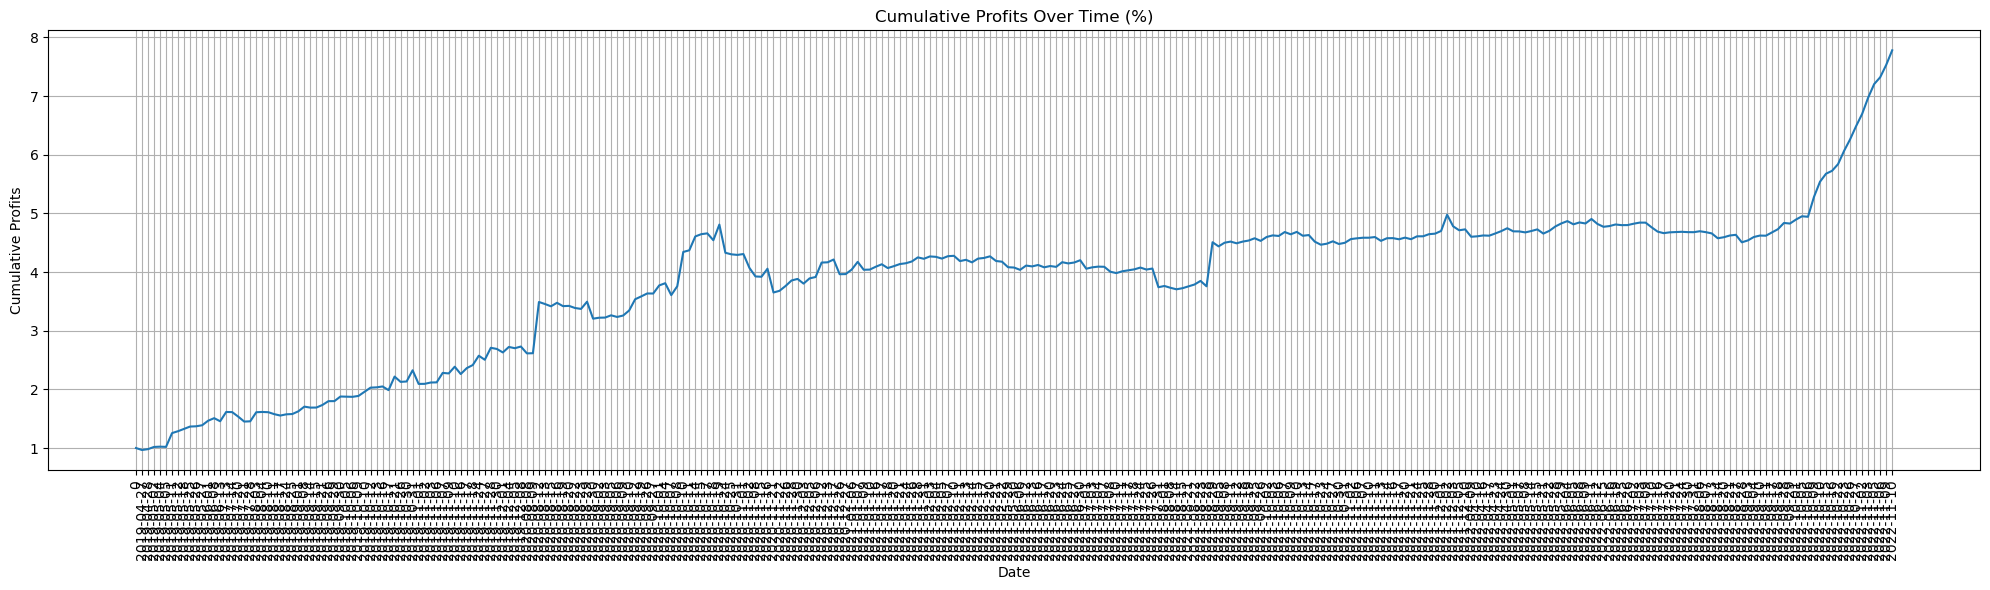

In [19]:
# Create a line plot
plt.figure(figsize=(20, 6))
plt.plot(['0'] + list(track_record.datetime), stake, linestyle='-')
plt.title('Cumulative Profits Over Time (%)')
plt.xlabel('Date')
plt.ylabel('Cumulative Profits')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()